In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # importing the libraries we will be using in this analysis
import matplotlib 
plt.style.use("fivethirtyeight")
matplotlib.rcParams["figure.figsize"] = (14,6)

In [17]:
df = pd.read_csv("Traffic.csv") # reading a csv file using pandas

In [18]:
df.head() # displaying the first five rows of the dataset

,Unnamed: 0,year,day,limit,y
0,1,1961,1,no,9
1,2,1961,2,no,11
2,3,1961,3,no,9
3,4,1961,4,no,20
4,5,1961,5,no,31


In [19]:
df.tail() # displaying the last five rows of the dataset 

,Unnamed: 0,year,day,limit,y
179,180,1962,88,yes,16
180,181,1962,89,yes,25
181,182,1962,90,yes,14
182,183,1962,91,yes,15
183,184,1962,92,yes,9


In [20]:
df.duplicated().sum() # checking for duplicated values

0

In [21]:
df.shape # using the shape attribute to display the number of rows and columns

(184, 5)

In [22]:
df.info() # using the info attribute to diplay the total number of non-null values, and the datatype of the columns in the dataset, in essence a concise summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  184 non-null    int64 
 1   year        184 non-null    int64 
 2   day         184 non-null    int64 
 3   limit       184 non-null    object
 4   y           184 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.3+ KB


There are no null values in the columns.

In [23]:
#Rename the columns and drop the unnamed: 0 column
df2 = df.drop("Unnamed: 0",axis=1) # we will be dropping the "Unnamed:0" column since it is a repetition of the index column 
df2.head() # We then print the first five rows of the dataset to show that the "Unnamed: 0" column has been dropped

,year,day,limit,y
0,1961,1,no,9
1,1961,2,no,11
2,1961,3,no,9
3,1961,4,no,20
4,1961,5,no,31


In [24]:
# this renames all columns with more descriptive names
df2.rename(columns={"y": "accident_count", "limit": "speed_limit"}, inplace=True) # Changing the column names to more descriptive names
df2.head()

,year,day,speed_limit,accident_count
0,1961,1,no,9
1,1961,2,no,11
2,1961,3,no,9
3,1961,4,no,20
4,1961,5,no,31


In [25]:
df2["speed_limit"] = df2["speed_limit"].astype("category") # changing the datatype of the speed_limit column to category
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            184 non-null    int64   
 1   day             184 non-null    int64   
 2   speed_limit     184 non-null    category
 3   accident_count  184 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 4.7 KB


In [26]:
df2["year"].value_counts()

1961    92
1962    92
Name: year, dtype: int64

In [27]:
day_list = list(df2["day"]) 
print(day_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [28]:
year_1961 = df2[df2["year"]==1961]
year_1962 = df2[df2["year"]==1962]

In [29]:
year_1961.head()

,year,day,speed_limit,accident_count
0,1961,1,no,9
1,1961,2,no,11
2,1961,3,no,9
3,1961,4,no,20
4,1961,5,no,31


In [30]:
year_1962.head()

,year,day,speed_limit,accident_count
92,1962,1,no,9
93,1962,2,no,20
94,1962,3,no,15
95,1962,4,no,14
96,1962,5,no,30


I will add a month column using data from the day column. since each year has 92 days, i will assume any 3 month period with 92 days(oct-dec or may-july or june-aug or aug-oct e.t.c). this is just hypothetical though.

In [31]:
# using an hypothetical October to december timeline
bins = (0, 31, 61,93)
group_names = ["october", "november", "december"]
year_1961["month"] = pd.cut(year_1961["day"],bins=bins,labels=group_names)

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\3651033623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1961["month"] = pd.cut(year_1961["day"],bins=bins,labels=group_names)


In [32]:
bins = (0, 31, 61,93)
group_names = ["october", "november", "december"]
year_1962["month"] = pd.cut(year_1962["day"],bins=bins,labels=group_names)

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\2138432597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1962["month"] = pd.cut(year_1962["day"],bins=bins,labels=group_names)


In [33]:
year_1961.head()

,year,day,speed_limit,accident_count,month
0,1961,1,no,9,october
1,1961,2,no,11,october
2,1961,3,no,9,october
3,1961,4,no,20,october
4,1961,5,no,31,october


In [34]:
year_1962.head()

,year,day,speed_limit,accident_count,month
92,1962,1,no,9,october
93,1962,2,no,20,october
94,1962,3,no,15,october
95,1962,4,no,14,october
96,1962,5,no,30,october


# EDA

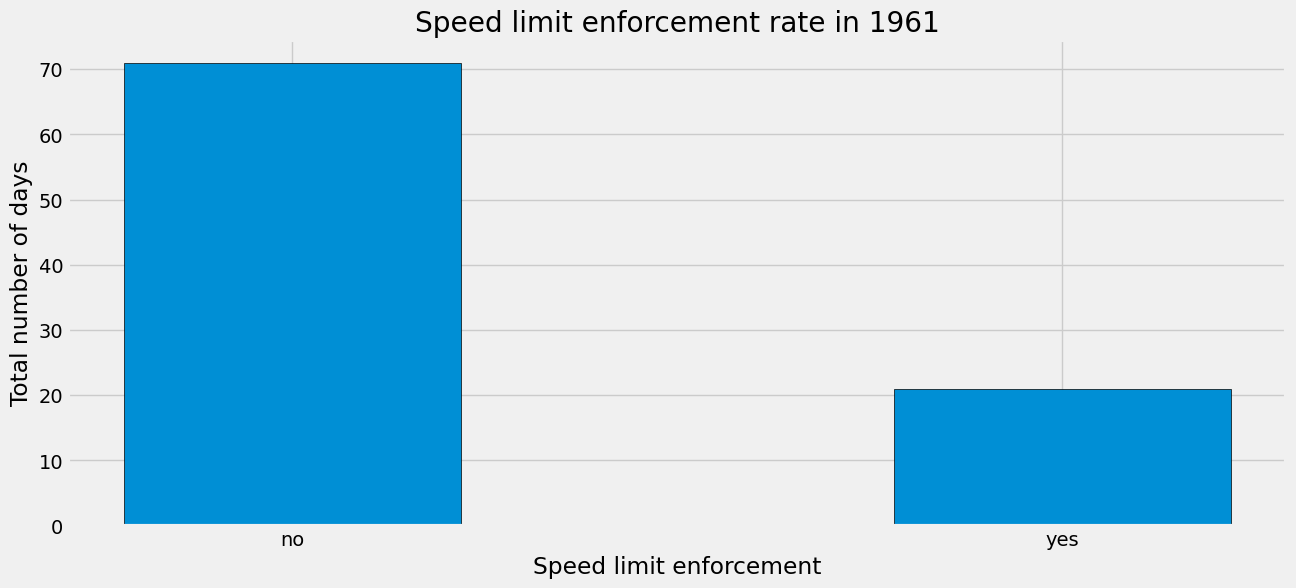

In [35]:
# 1961
width = 0.35 # specifying the width of each bar
x = (0,0.8) # specifying the position of the two bars on the x-axis

enforcement_count = year_1961["speed_limit"].value_counts()
plt.bar(x, enforcement_count, width, edgecolor="black")
plt.xticks(x,enforcement_count.index)
plt.title("Speed limit enforcement rate in 1961")
plt.xlabel("Speed limit enforcement")
plt.ylabel("Total number of days")
plt.show()

Text(0.5, 1.0, 'Was speed limit rate enforced?')

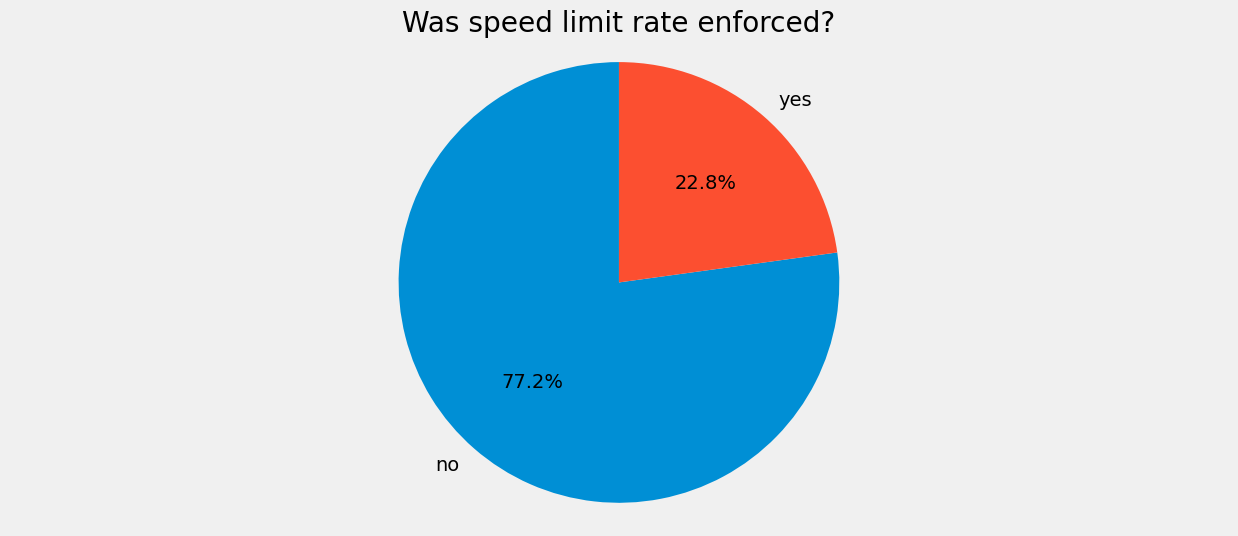

In [36]:
plt.pie(enforcement_count, labels=enforcement_count.index, shadow=False,
startangle=90, autopct='%1.1f%%',)
plt.axis('equal')
plt.title("Was speed limit rate enforced?")

In [37]:
year_1962["speed_limit"].value_counts()

yes    48
no     44
Name: speed_limit, dtype: int64

The speed limit was enforced just 23% of the time in 1961 or 21 out of the 92 days measured.

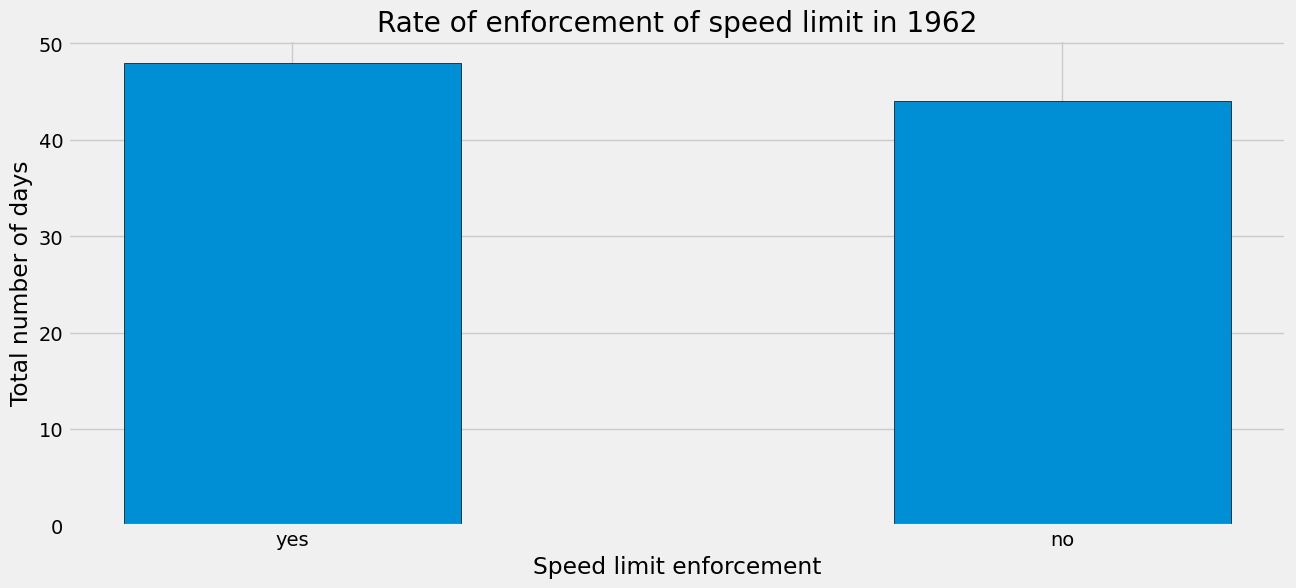

In [38]:
# 1962
width = 0.35 # specifying the width of each bar
x = (0,0.8) # specifying the position of the two bars on the x-axis

enforcement_count_1962 = year_1962["speed_limit"].value_counts()
plt.bar(x, enforcement_count_1962, width, edgecolor="black")
plt.xticks(x,enforcement_count_1962.index)
plt.title("Rate of enforcement of speed limit in 1962")
plt.xlabel("Speed limit enforcement")
plt.ylabel("Total number of days")
plt.show()

Text(0.5, 1.0, 'Was speed limit rate enforced?')

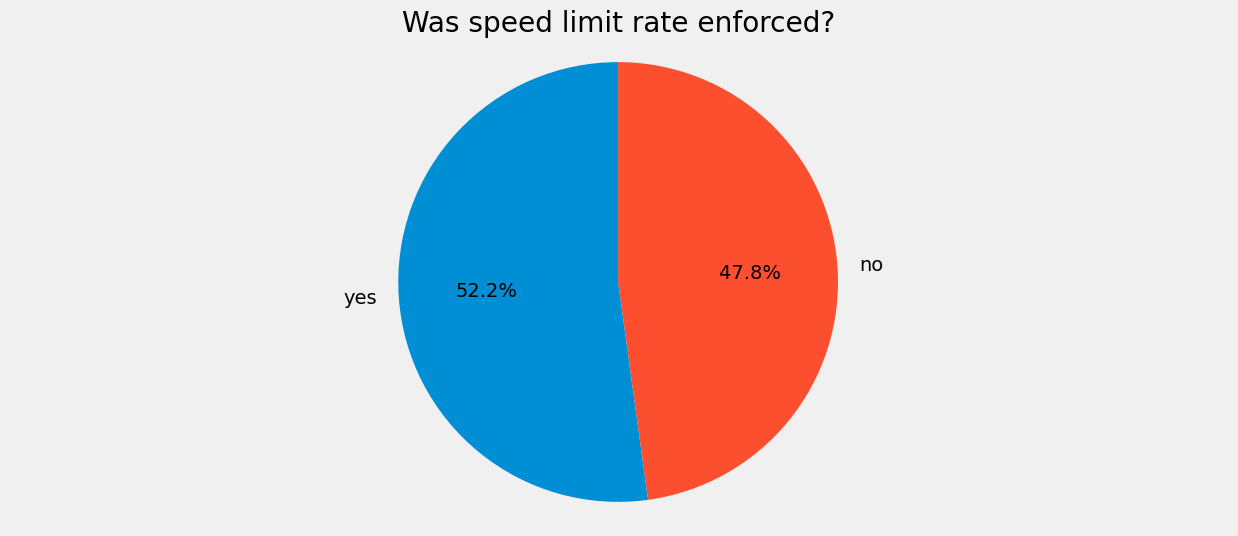

In [40]:
plt.pie(enforcement_count_1962, labels=enforcement_count_1962.index, shadow=False, startangle=90, autopct="%1.1f%%",)
plt.axis("equal")
plt.title("Was speed limit rate enforced?")

In contrast, the speed limit rule was enforced 52.2% of the time or 48 out of 92 days measured in 1962.

#### Now let's check if enforcement of speed limit rule has a bearing on total number of accidents

In [41]:
count_1961 = year_1961["accident_count"].sum()
count_1962 = year_1962["accident_count"].sum()

print("Accidents Frequency:")
print("1961:", count_1961)
print("1962:", count_1962)

Accidents Frequency:
1961: 2094
1962: 1871


There were more accidents in 1961 than in 1962, but not as much as should be expected for the wide difference in speed limit enforcement rate, this difference could have been from any number of factors, it's not enough to confidently say speed limit enforcement reduces accidents.  let's do a deeper dive.

### 1961

In [42]:
enforced_speed = year_1961[year_1961["speed_limit"]== "yes"]
non_enforced_speed = year_1961[year_1961["speed_limit"]== "no"]

count_enforced = enforced_speed["accident_count"].sum()
count_non_enforced = non_enforced_speed["accident_count"].sum()

print("\nAccident Frequency:")
print("Enforced speed limit accidents:", count_enforced)
print("Non enforced speed limit accidents:", count_non_enforced)

print('\nDays speed limit was enforced:', len(enforced_speed))
print('Days speed limit was not enforced:', len(non_enforced_speed))

print('\nAccidents per days speed limit was enforced:', round(count_enforced/len(enforced_speed), 2))
print('Accidents per days speed limit was not enforced:', round(count_non_enforced/len(non_enforced_speed), 2))


Accident Frequency:
Enforced speed limit accidents: 413
Non enforced speed limit accidents: 1681

Days speed limit was enforced: 21
Days speed limit was not enforced: 71

Accidents per days speed limit was enforced: 19.67
Accidents per days speed limit was not enforced: 23.68


There are more accidents on days speed limit was not enforced than days speed limit was enforced is this enough to say speed limit reduces accidents? well maybe. 

## 1962

In [44]:
enforced_speed2 = year_1962[year_1962["speed_limit"]== "yes"]
non_enforced_speed2 = year_1962[year_1962["speed_limit"]== "no"]

count_enforced2 = enforced_speed2["accident_count"].sum()
count_non_enforced2 = non_enforced_speed2["accident_count"].sum()

print("\nAccident Frequency:")
print("Enforced speed limit accidents:", count_enforced2)
print("Non enforced speed limit accidents:", count_non_enforced2)

print("\nDays speed limit was enforced:", len(enforced_speed2))
print("Days speed limit was not enforced:", len(non_enforced_speed2))

print("\nAccidents per days speed limit was enforced:", round(count_enforced2/len(enforced_speed2), 2))
print("Accidents per days speed limit was not enforced:", round(count_non_enforced2/len(non_enforced_speed2), 2))


Accident Frequency:
Enforced speed limit accidents: 892
Non enforced speed limit accidents: 979

Days speed limit was enforced: 48
Days speed limit was not enforced: 44

Accidents per days speed limit was enforced: 18.58
Accidents per days speed limit was not enforced: 22.25


Again, similar to 1961, there are  more accidents in days speed limit was not enforced. but the difference could be  small enough that other factors could be at play. 
let's see by how much accidents are reduced with speed limit enforcement, using a simple mathematical approach.

In [45]:
print(f"Enforcement of speed limit reduced accidents rate by: {round((23.68-19.67)/23.68 * 100, 2)}% in 1961")
print(f"Enforcement of speed limit reduced accidents rate by: {round((22.25-18.58)/22.25 * 100, 2)}% in 1962")

Enforcement of speed limit reduced accidents rate by: 16.93% in 1961
Enforcement of speed limit reduced accidents rate by: 16.49% in 1962


Wow. it shows similar level of reduction in both years. confirming that speed limit enforcement reduced rate of accidents.
Also a 16-17% reduction in accident rate is a lot of lives saved.

# 1961

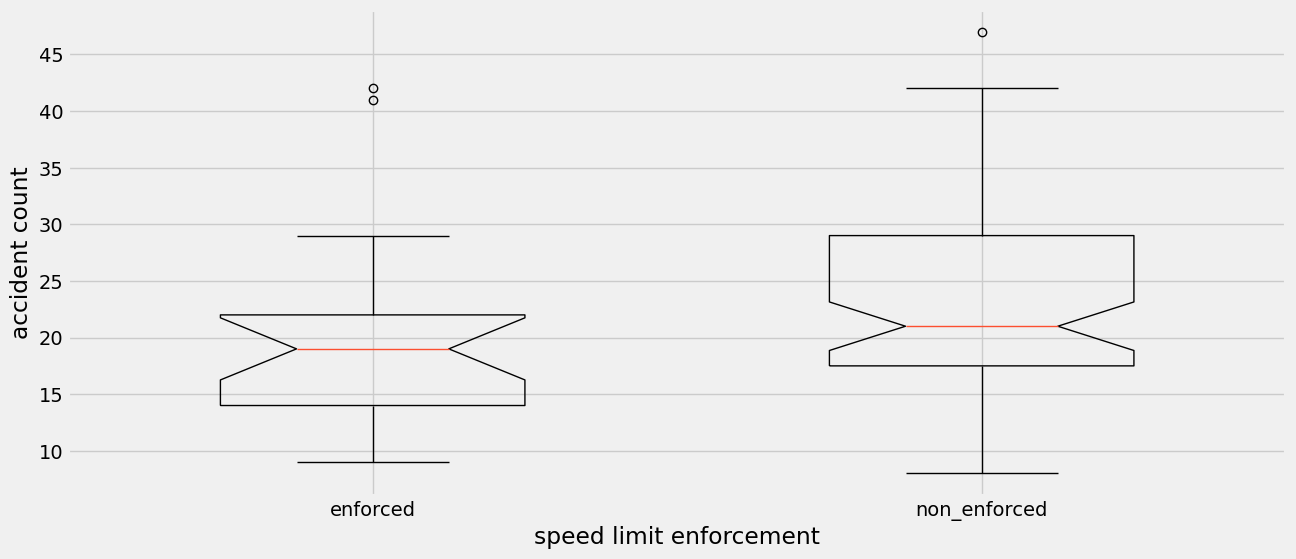

In [46]:
enforced = year_1961[year_1961["speed_limit"]=="yes"]
non_enforced = year_1961[year_1961["speed_limit"]=="no"]

plt.boxplot([enforced.accident_count, non_enforced.accident_count],notch=True, widths=(0.5,0.5))
plt.xlabel("speed limit enforcement")
plt.ylabel("accident count")
plt.xticks([1,2], ["enforced","non_enforced"])
plt.show()

# 1962

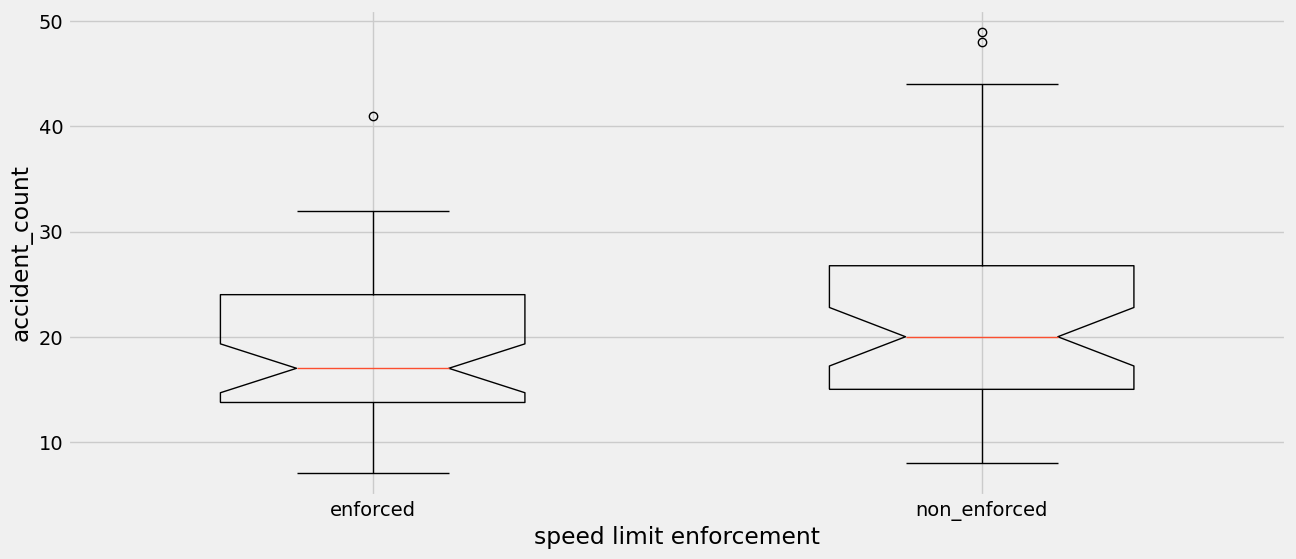

In [47]:
enforced = year_1962[year_1962["speed_limit"]=="yes"]
non_enforced = year_1962[year_1962["speed_limit"]=="no"]

plt.boxplot([enforced.accident_count, non_enforced.accident_count], notch=True, widths=(0.5))
plt.xlabel("speed limit enforcement")
plt.ylabel("accident_count")
plt.xticks([1,2],["enforced","non_enforced"])
plt.show()

### Let's see which month has the highest number of accidents in both years and the monthly average.

## 1961

In [48]:
oct_61 = year_1961[year_1961["month"]== "october"]
nov_61 = year_1961[year_1961["month"]== "november"]
dec_61 = year_1961[year_1961["month"]== "december"]

count_oct_61 = oct_61["accident_count"].sum() 
count_nov_61 = nov_61["accident_count"].sum() 
count_dec_61 = dec_61["accident_count"].sum() 

average_oct_61_accidents = round(oct_61["accident_count"].mean(), 2)
average_nov_61_accidents = round(nov_61["accident_count"].mean(), 2) 
average_dec_61_accidents = round(dec_61["accident_count"].mean(), 2) 

print("Total accidents in october 1961:", count_oct_61)
print("Total accidents in november 1961:", count_nov_61)
print("Total accidents in december 1961:", count_dec_61)

print(" ")

print("Average accidents in october 1961:", average_oct_61_accidents)
print("Average accidents in november 1961:", average_nov_61_accidents)
print("Average accidents in december 1961:", average_dec_61_accidents)

Total accidents in october 1961: 623
Total accidents in november 1961: 771
Total accidents in december 1961: 700
 
Average accidents in october 1961: 20.1
Average accidents in november 1961: 25.7
Average accidents in december 1961: 22.58


## 1962

In [49]:
oct_62 = year_1962[year_1962["month"]== "october"]
nov_62 = year_1962[year_1962["month"]== "november"]
dec_62 = year_1962[year_1962["month"]== "december"]

count_oct_62 = oct_62["accident_count"].sum() 
count_nov_62 = nov_62["accident_count"].sum() 
count_dec_62 = dec_62["accident_count"].sum() 

average_oct_62_accidents = round(oct_62["accident_count"].mean(), 2)
average_nov_62_accidents = round(nov_62["accident_count"].mean(), 2) 
average_dec_62_accidents = round(dec_62["accident_count"].mean(), 2) 

print("Total accidents in october 1962:", count_oct_62)
print("Total accidents in november 1962:", count_nov_62)
print("Total accidents in december 1962:", count_dec_62)

print(" ")

print("Average accidents in october 1962:", average_oct_62_accidents)
print("Average accidents in november 1962:", average_nov_62_accidents)
print("Average accidents in december 1962:", average_dec_62_accidents)

Total accidents in october 1962: 517
Total accidents in november 1962: 678
Total accidents in december 1962: 676
 
Average accidents in october 1962: 16.68
Average accidents in november 1962: 22.6
Average accidents in december 1962: 21.81


### Time series analysis

## 1961

In [51]:
import datetime
def convert_to_date(x):
    return datetime.date(1961,9,30)+datetime.timedelta(days=x)

In [52]:
year_1961["day_date"] = year_1961["day"].apply(convert_to_date)

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\3115102095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1961["day_date"] = year_1961["day"].apply(convert_to_date)


In [53]:
year_1961.head()

,year,day,speed_limit,accident_count,month,day_date
0,1961,1,no,9,october,1961-10-01
1,1961,2,no,11,october,1961-10-02
2,1961,3,no,9,october,1961-10-03
3,1961,4,no,20,october,1961-10-04
4,1961,5,no,31,october,1961-10-05


In [54]:
year_1961.tail()

,year,day,speed_limit,accident_count,month,day_date
87,1961,88,no,24,december,1961-12-27
88,1961,89,no,30,december,1961-12-28
89,1961,90,no,25,december,1961-12-29
90,1961,91,no,8,december,1961-12-30
91,1961,92,no,21,december,1961-12-31


In [55]:
#convert day date to datetime
year_1961["day_date"]= pd.to_datetime(year_1961["day_date"])
year_1961.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            92 non-null     int64         
 1   day             92 non-null     int64         
 2   speed_limit     92 non-null     category      
 3   accident_count  92 non-null     int64         
 4   month           92 non-null     category      
 5   day_date        92 non-null     datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(3)
memory usage: 4.0 KB


C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\3964588953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1961["day_date"]= pd.to_datetime(year_1961["day_date"])


In [56]:
#Group by accidents for for each day in Oct-Dec, 1961

year_1961_accidents = year_1961.groupby("day_date")["accident_count"].sum().reset_index()

In [57]:
year_1961_accidents.head()

,day_date,accident_count
0,1961-10-01,9
1,1961-10-02,11
2,1961-10-03,9
3,1961-10-04,20
4,1961-10-05,31


In [58]:
# check day with the highest number of accidents in 1961
year_1961_accidents[["day_date", "accident_count"]].max()

day_date          1961-12-31 00:00:00
accident_count                     47
dtype: object

December 31st had the highest number of accidents in the year.

In [59]:
year_1961_accidents_2 = year_1961_accidents.set_index("day_date")
year_1961_accidents_2.index

DatetimeIndex(['1961-10-01', '1961-10-02', '1961-10-03', '1961-10-04',
               '1961-10-05', '1961-10-06', '1961-10-07', '1961-10-08',
               '1961-10-09', '1961-10-10', '1961-10-11', '1961-10-12',
               '1961-10-13', '1961-10-14', '1961-10-15', '1961-10-16',
               '1961-10-17', '1961-10-18', '1961-10-19', '1961-10-20',
               '1961-10-21', '1961-10-22', '1961-10-23', '1961-10-24',
               '1961-10-25', '1961-10-26', '1961-10-27', '1961-10-28',
               '1961-10-29', '1961-10-30', '1961-10-31', '1961-11-01',
               '1961-11-02', '1961-11-03', '1961-11-04', '1961-11-05',
               '1961-11-06', '1961-11-07', '1961-11-08', '1961-11-09',
               '1961-11-10', '1961-11-11', '1961-11-12', '1961-11-13',
               '1961-11-14', '1961-11-15', '1961-11-16', '1961-11-17',
               '1961-11-18', '1961-11-19', '1961-11-20', '1961-11-21',
               '1961-11-22', '1961-11-23', '1961-11-24', '1961-11-25',
      

In [60]:
# Another way to check  Average accidents in  each month
average_accidents_month = year_1961_accidents_2["accident_count"].resample("MS").mean()

In [61]:
round(average_accidents_month, 2) 

day_date
1961-10-01    20.10
1961-11-01    25.70
1961-12-01    22.58
Freq: MS, Name: accident_count, dtype: float64

### Vizualizing the time series data

<AxesSubplot:xlabel='day_date'>

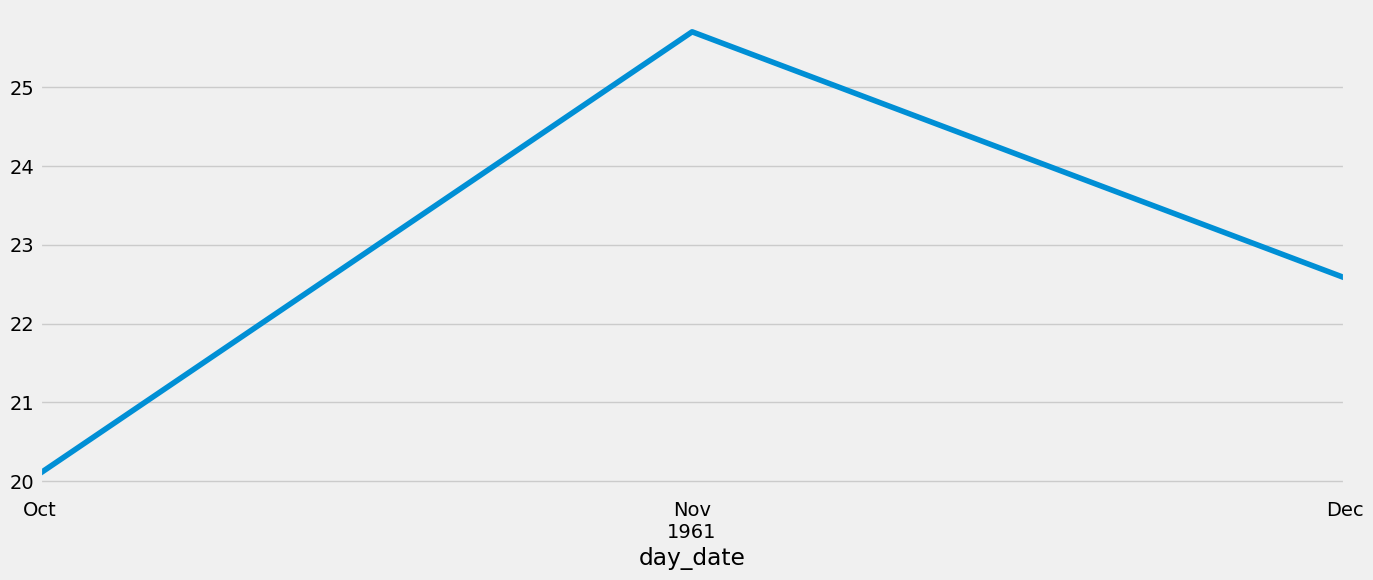

In [62]:
average_accidents_month.plot(figsize=(15, 6))

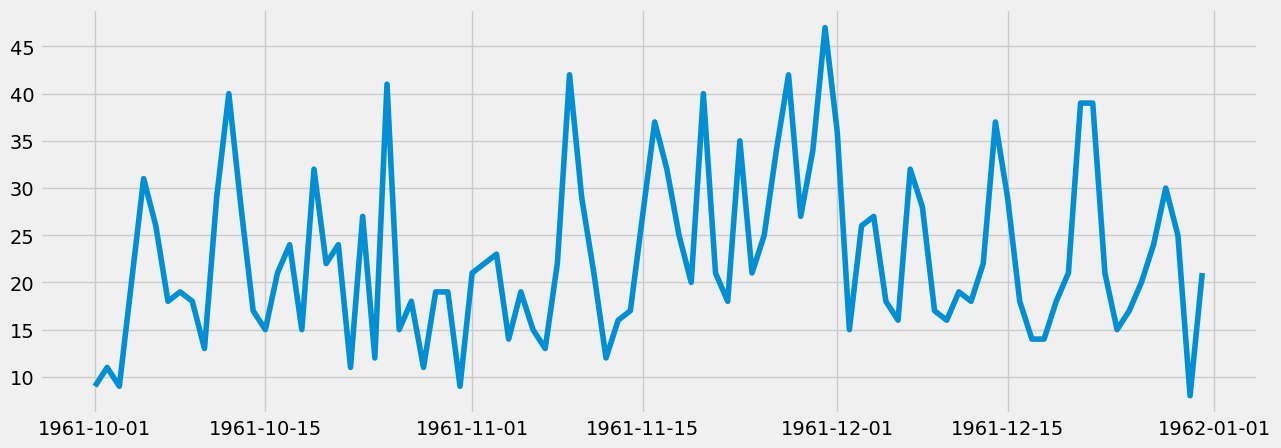

In [63]:
# lets plot for accidents per day
matplotlib.rcParams["figure.figsize"] = (14,5)
plt.plot(year_1961_accidents_2.index, year_1961_accidents_2["accident_count"], label= "Number of accidents per day")

In [64]:
year_1961_accidents_per_day = year_1961.set_index("day_date")

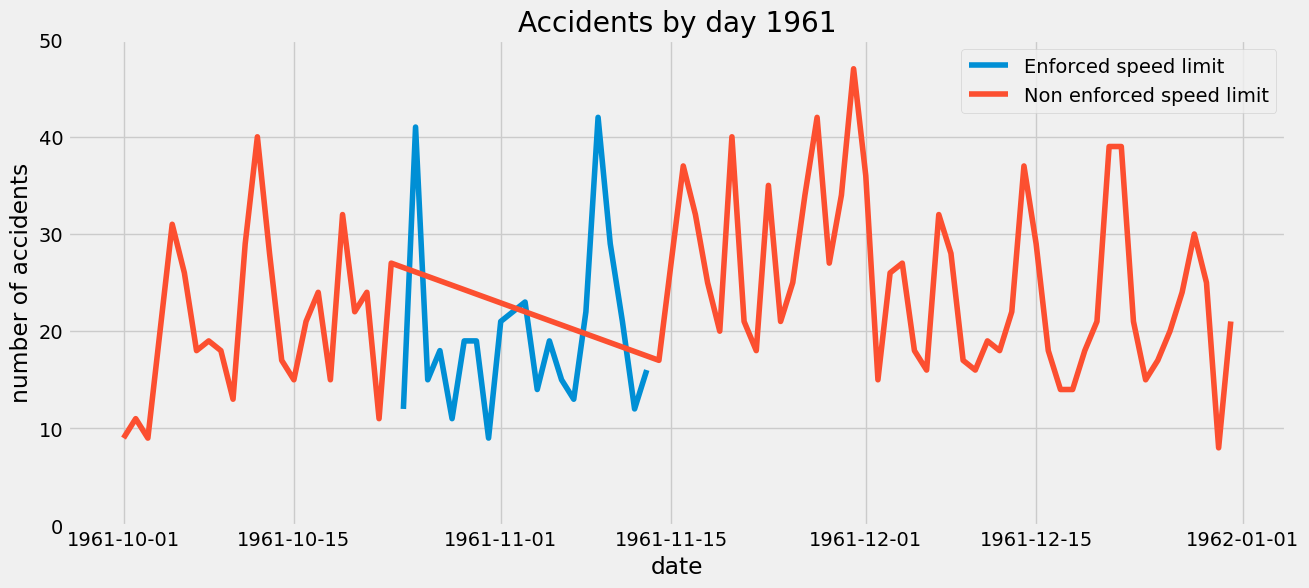

In [65]:
# plot for accidents per day for both enforced and non enforced speed limits
day_enforced = year_1961_accidents_per_day[ year_1961_accidents_per_day["speed_limit"]=="yes"]
day_non_enforced = year_1961_accidents_per_day[ year_1961_accidents_per_day["speed_limit"]=="no"]

accidents_by_day_enforced = day_enforced.groupby("day_date").sum()
accidents_by_day_non_enforced = day_non_enforced.groupby("day_date").sum()


plt.figure(figsize=(14,6))
plt.rcParams["figure.autolayout"] = True
plt.plot(accidents_by_day_enforced.index, accidents_by_day_enforced["accident_count"], label= "Enforced speed limit")
plt.plot(accidents_by_day_non_enforced.index, accidents_by_day_non_enforced["accident_count"], label= "Non enforced speed limit")
plt.xlabel("date")
plt.ylabel("number of accidents")
plt.ylim([0, 50])
plt.title("Accidents by day 1961")
plt.legend()

We can see  that  speed limit was enforced only during a one month period from around Oct 20 - Nov 15.

Now let's check if enforcement of speed limit is credicted with reducing accidents(we already confirmed before though, this is just using another method), using p-value(remember p-values lesser than 0.05 are considered statistically significant, meaning there is no observed difference between eforcement and non-enforcement of speed limit rule, and therefore we will reject the null hypothesis that speed limit rule reduces accidents in 1961 and accept the alternate hypothesis that it does not).

In [66]:
t_statistic, p_value =ttest_ind(accidents_by_day_enforced["accident_count"], accidents_by_day_non_enforced["accident_count"])
print("\nStatistical significance:")
print("T_statistic:", t_statistic)
print("p-Value:", p_value)


Statistical significance:
T_statistic: -1.8364656214029287
p-Value: 0.06959004291312151


In 1961, there is no significance on the observed variables, with the p-value greater than 0.05, it means we will accept the null hypothesis that speed limit enforcement reduces accident rates. 

## 1962

In [67]:
import datetime
def convert_to_date(x):
    return datetime.date(1962,9,30)+datetime.timedelta(days=x)

In [68]:
year_1962["day_date"] = year_1962["day"].apply(convert_to_date)

C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\562579016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1962["day_date"] = year_1962["day"].apply(convert_to_date)


In [69]:
#convert day date to datetime
year_1962["day_date"]= pd.to_datetime(year_1962["day_date"])
year_1962.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 92 to 183
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            92 non-null     int64         
 1   day             92 non-null     int64         
 2   speed_limit     92 non-null     category      
 3   accident_count  92 non-null     int64         
 4   month           92 non-null     category      
 5   day_date        92 non-null     datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(3)
memory usage: 4.0 KB


C:\Users\HP REVOLVE\AppData\Local\Temp\ipykernel_9232\2937737402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1962["day_date"]= pd.to_datetime(year_1962["day_date"])


In [70]:
#Group by accidents for for each day in Oct-Dec, 1962
year_1962_accidents = year_1962.groupby("day_date")["accident_count"].sum().reset_index()

In [71]:
# check day with the highest number of accidents in 1962
year_1962_accidents[["day_date", "accident_count"]].max()

day_date          1962-12-31 00:00:00
accident_count                     49
dtype: object

In [72]:
year_1962_accidents_2 = year_1962_accidents.set_index("day_date")

In [73]:
# Another way to check  Average accidents in  each month
average_accidents_month_62 = year_1962_accidents_2["accident_count"].resample("MS").mean()
round(average_accidents_month_62, 2) 

day_date
1962-10-01    16.68
1962-11-01    22.60
1962-12-01    21.81
Freq: MS, Name: accident_count, dtype: float64

### Vizualizing the time series data

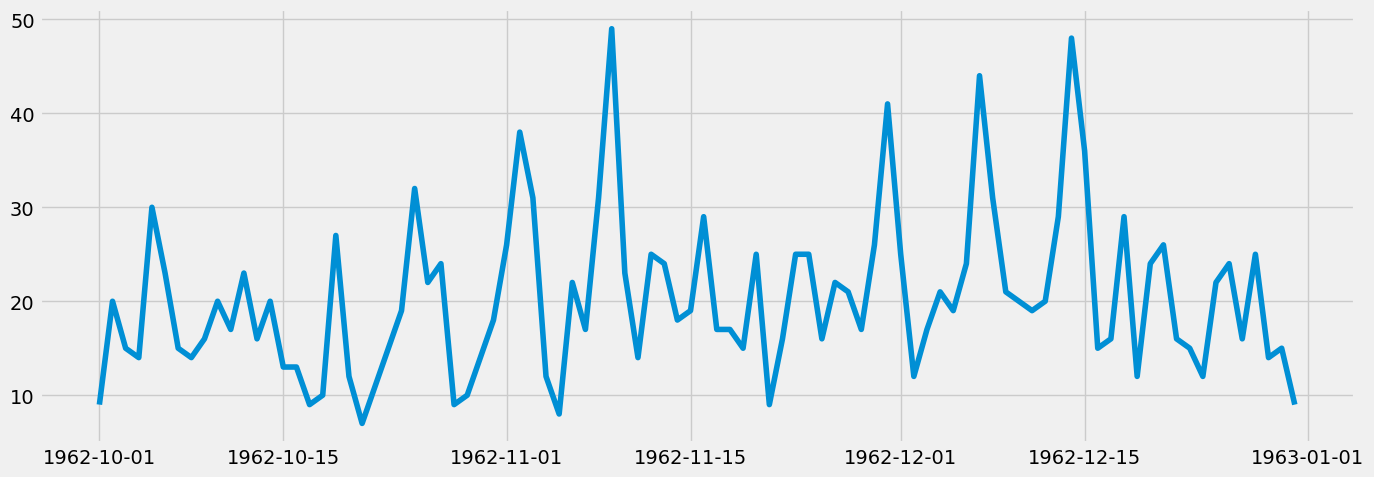

In [74]:
#  for accidents per day
matplotlib.rcParams["figure.figsize"] = (14,5)
plt.plot(year_1962_accidents_2.index, year_1962_accidents_2["accident_count"], label= "Number of accidents per day")

In [75]:
# comparing accidents for enforced and non enforced speed limit rule
year_1962_accidents_per_day = year_1962.set_index("day_date")

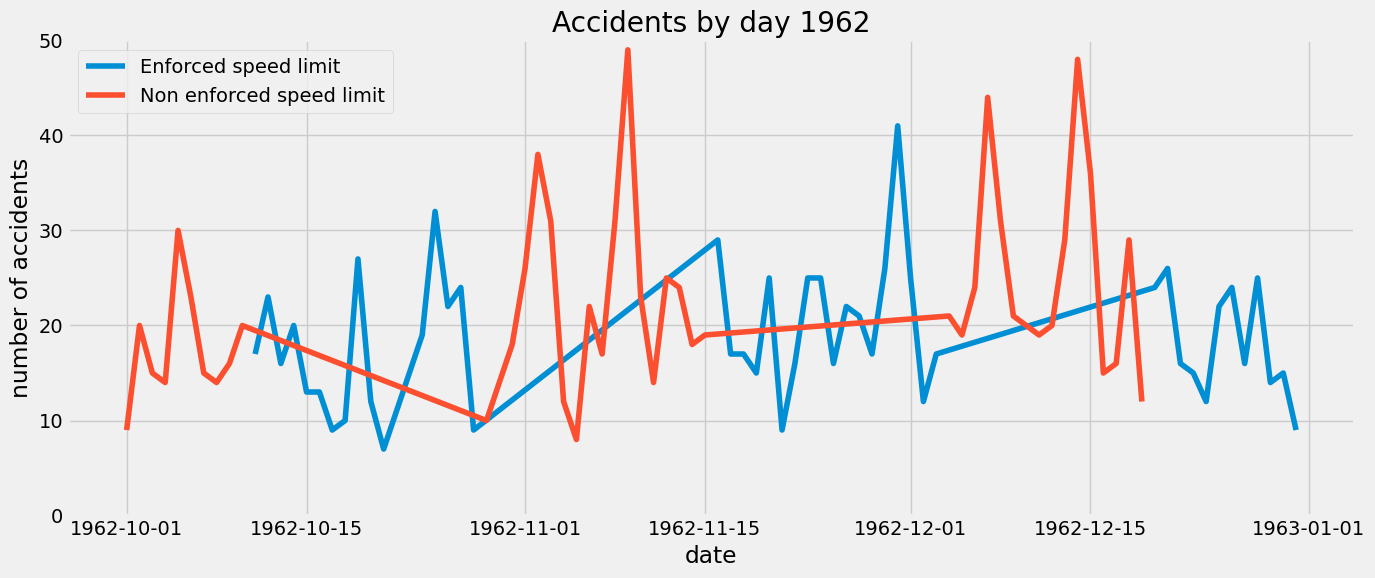

In [76]:
day_enforced_62 = year_1962_accidents_per_day[ year_1962_accidents_per_day["speed_limit"]=="yes"]
day_non_enforced_62 = year_1962_accidents_per_day[ year_1962_accidents_per_day["speed_limit"]=="no"]

accidents_by_day_enforced_62 = day_enforced_62.groupby("day_date").sum()
accidents_by_day_non_enforced_62 = day_non_enforced_62.groupby("day_date").sum()


plt.figure(figsize=(14,6))
plt.rcParams["figure.autolayout"] = True
plt.plot(accidents_by_day_enforced_62.index, accidents_by_day_enforced_62["accident_count"], label= "Enforced speed limit")
plt.plot(accidents_by_day_non_enforced_62.index, accidents_by_day_non_enforced_62["accident_count"], label= "Non enforced speed limit")
plt.xlabel("date")
plt.ylabel("number of accidents")
plt.ylim([0, 50])
plt.title("Accidents by day 1962")
plt.legend()

In [77]:
t_statistic, p_value =ttest_ind(accidents_by_day_enforced_62["accident_count"], accidents_by_day_non_enforced_62["accident_count"])
print("\nStatistical significance:")
print("T_statistic:", t_statistic)
print("p-Value:", p_value)


Statistical significance:
T_statistic: -2.0938279854056767
p-Value: 0.03908751181369783


The value is less than 0.05, therefore we will reject the null hypothesis and accept the alternate hypothesis that speed limit rule enforcement did not reduce accident rates in 1962. but from the rate calculated above, it showed a clear reduction of almost 17%.  What then is the reason?
It could have been that some outlier results influenced the total accident counts, from the vizualization above you can see some days where the accident count for non-enforced is way higher than other days. some factors may have caused the total number of accidents to be superficially high on those days that have nothing to do with enforcement of speed limit. but we do not know from this dataset, so: 'In 1962, there is  correlation between speed limit enforcement and reduction in accident', but it cannot be definitively concluded that speed limit reduces accident'.